# Loading libraries

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import re
warnings.filterwarnings('ignore')

# Loading data

In [2]:
# === Load preselected SNP data === #
data = pd.read_csv("C:/Users/bciez/Documents/Basilio/Columbia_University/MLdosage/SNP_coding_chr1_chr22_additive_withPheno.csv")  # Replace with your full merged dataset if needed

# === Define features and target === #
X = data.drop(columns=["FID","IID","AGE","SEX","APOE4","ADRD","PC1","PC2","PC3","PC4","PC5"])  # Replace 'ADRD_FINAL' with your phenotype column
y = data["ADRD"]


In [3]:
X.tail(10)

,chr1:14993789:C:T_C,chr1:42835783:G:A_A,chr1:56080004:T:C_C,chr1:62220543:C:T_T,chr1:65752052:G:A_A,chr1:79687055:G:A_A,chr1:79698956:T:C_C,chr1:79699408:G:C_C,chr1:79699964:T:A_A,chr1:79702575:A:T_T,...,chr21:43211353:C:T_T,chr21:43263394:A:G_G,chr21:43265514:A:C_C,chr22:25221587:G:C_C,chr22:32785589:T:C_C,chr22:32798176:C:A_A,chr22:41583482:C:T_T,chr22:41587851:A:G_G,chr22:41590422:G:A_A,chr22:41642253:C:A_A
1133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1135,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1136,1,0,0,0,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1137,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1138,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,1
1141,1,0,0,0,0,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1142,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split data

In [4]:
# Check for NaNs or infinite values
print("NaNs in X:", X.isnull().sum().sum())
print("NaNs in y:", y.isnull().sum())
print("Infinite values in X:", np.isinf(X).sum().sum())

# Option 1: Drop rows with any NaNs in X or y
data_clean = data.dropna()
X = data_clean.drop(columns=["IID", "ADRD"])
y = data_clean["ADRD"]

# Option 2 (alternative): Fill NaNs (optional)
# X = X.fillna(0)

# Check again
print("After cleaning - NaNs in X:", X.isnull().sum().sum())
print("After cleaning - NaNs in y:", y.isnull().sum())


NaNs in X: 0
NaNs in y: 215
Infinite values in X: 0
After cleaning - NaNs in X: 0
After cleaning - NaNs in y: 0


In [5]:
data_clean = data.dropna()
data = data_clean.copy()
# Sanitize column names
X.columns = [re.sub(r'[^\w]', '_', col) for col in X.columns]

In [6]:
# === Split data === #
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# Logistic Regression Models

In [7]:
# === Logistic Regression Models === #
models = {
    "Logistic_Lasso": LogisticRegression(penalty='l1', solver='saga', max_iter=1000),
    "Logistic_Ridge": LogisticRegression(penalty='l2', solver='saga', max_iter=1000),
    "Logistic_ElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)
}

# Fitting

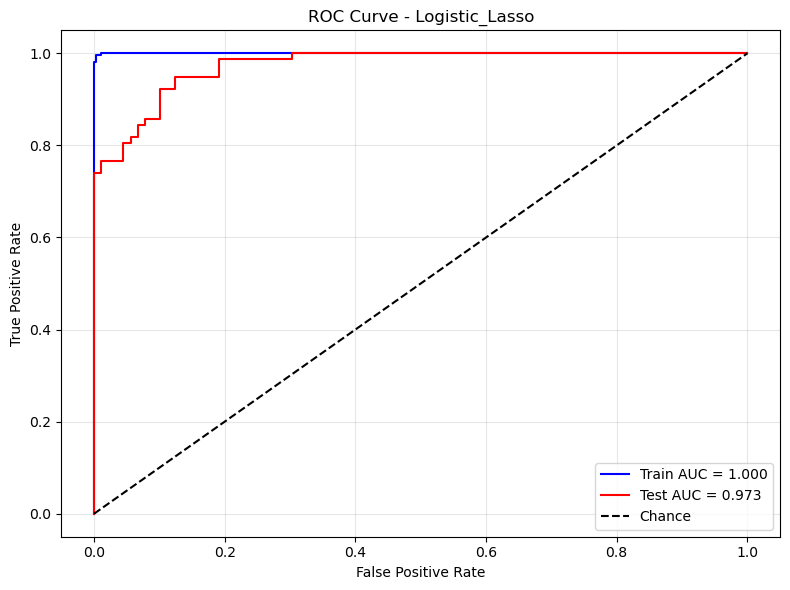

Logistic_Lasso - Train AUC: 0.9999 | Test AUC: 0.9733


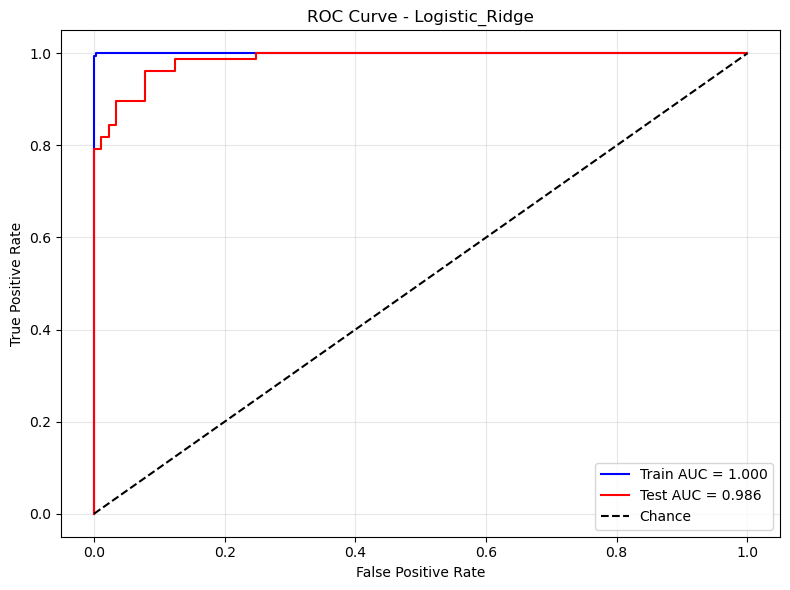

Logistic_Ridge - Train AUC: 1.0000 | Test AUC: 0.9858


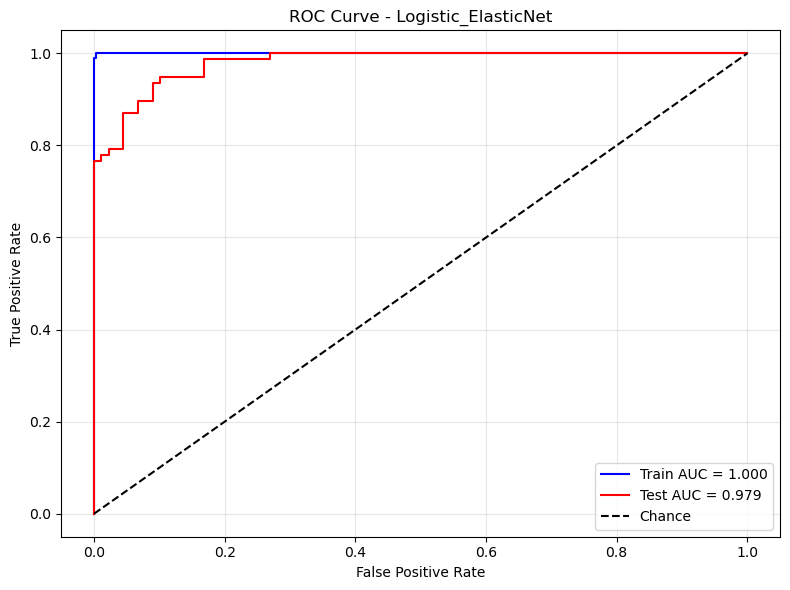

Logistic_ElasticNet - Train AUC: 1.0000 | Test AUC: 0.9794


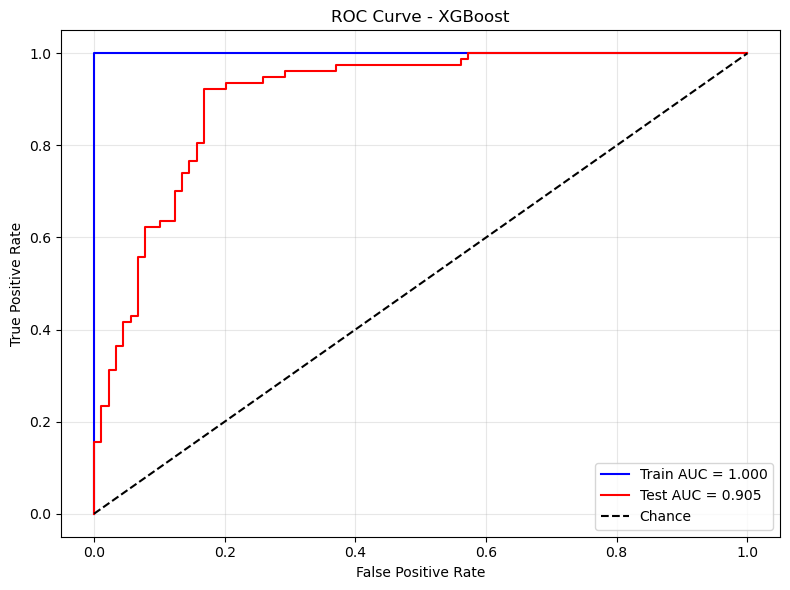

XGBoost - Train AUC: 1.0000 | Test AUC: 0.9052
[LightGBM] [Info] Number of positive: 309, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3044
[LightGBM] [Info] Number of data points in the train set: 664, number of used features: 653
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465361 -> initscore=-0.138777
[LightGBM] [Info] Start training from score -0.138777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

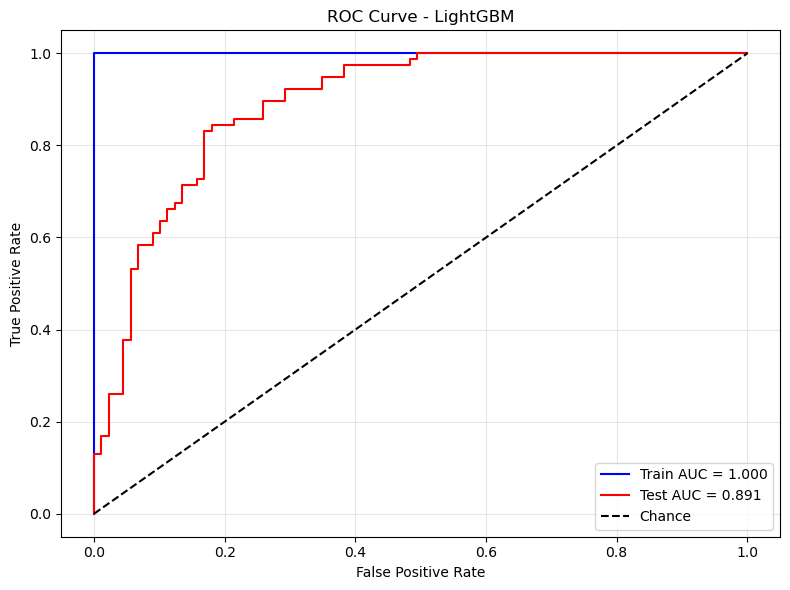

LightGBM - Train AUC: 1.0000 | Test AUC: 0.8913


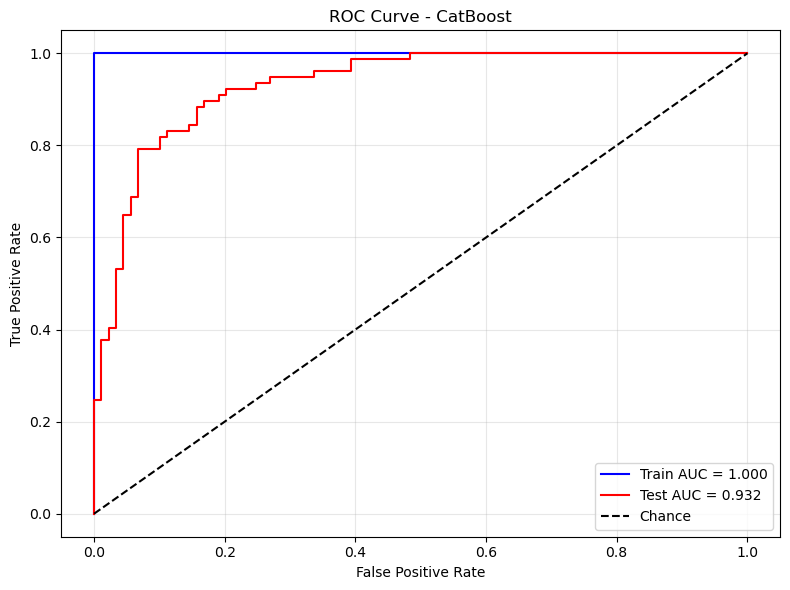

CatBoost - Train AUC: 1.0000 | Test AUC: 0.9321


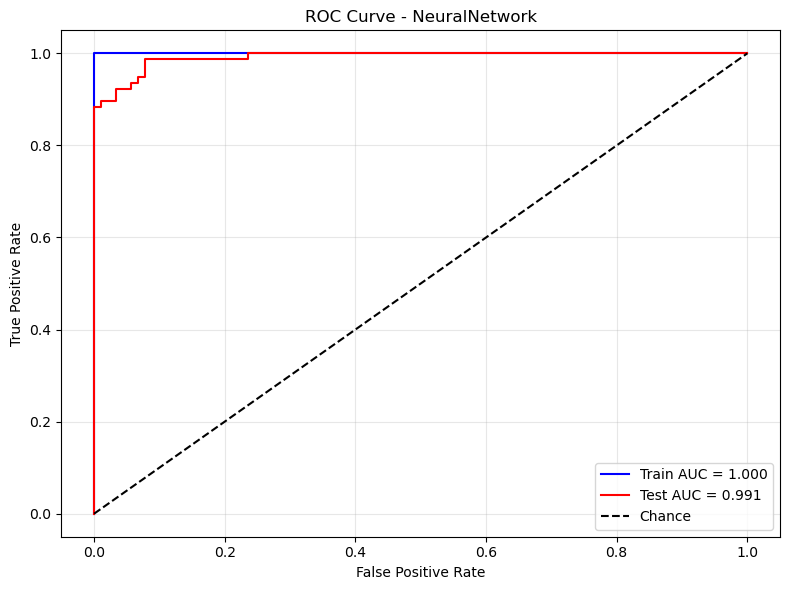

NeuralNetwork - Train AUC: 1.0000 | Test AUC: 0.9912


In [8]:
import matplotlib.pyplot as plt

# === Train, evaluate, and plot ROC curves === #
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predict probabilities
    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    # AUC scores
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)

    # ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}", color='blue')
    plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}", color='red')
    plt.plot([0, 1], [0, 1], "k--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"ROC_{name}.png")
    plt.show()

    print(f"{name} - Train AUC: {auc_train:.4f} | Test AUC: {auc_test:.4f}")

# Evaluation of feature importance

In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')


Evaluating Logistic_Lasso...
Mean ROC-AUC: 0.9821 ± 0.0045


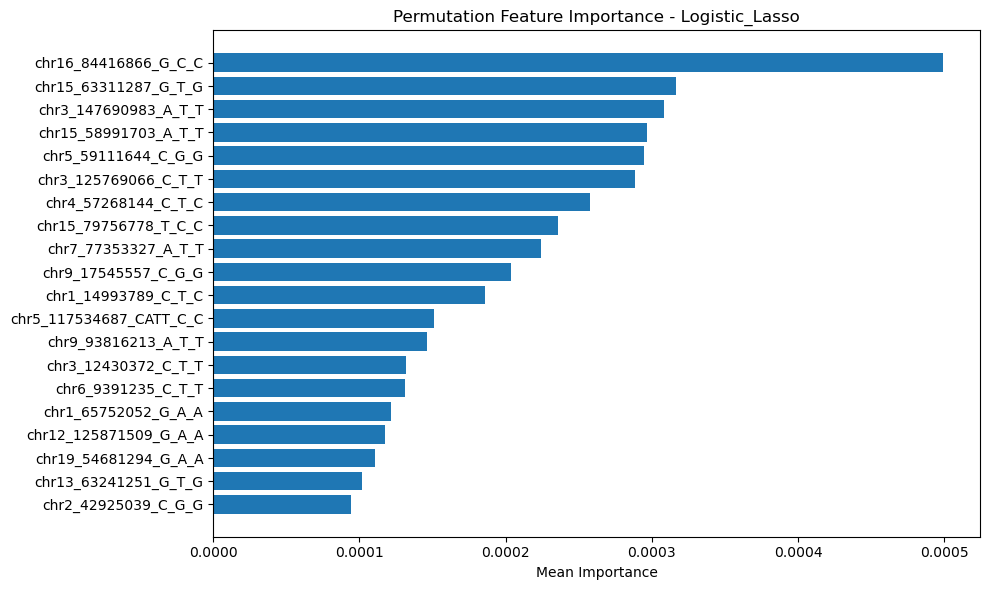


Evaluating Logistic_Ridge...
Mean ROC-AUC: 0.9875 ± 0.0052


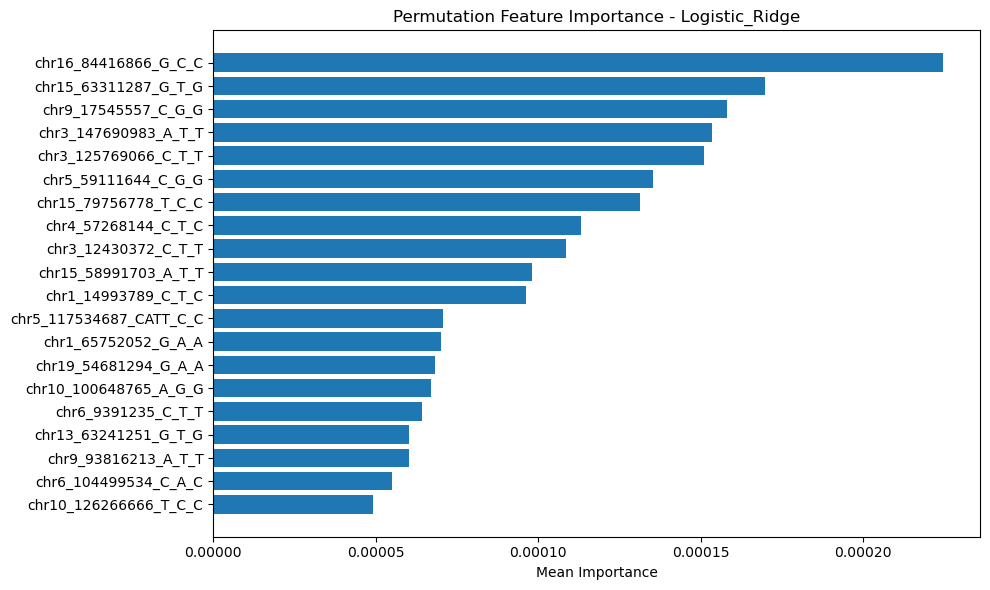


Evaluating Logistic_ElasticNet...
Mean ROC-AUC: 0.9848 ± 0.0050


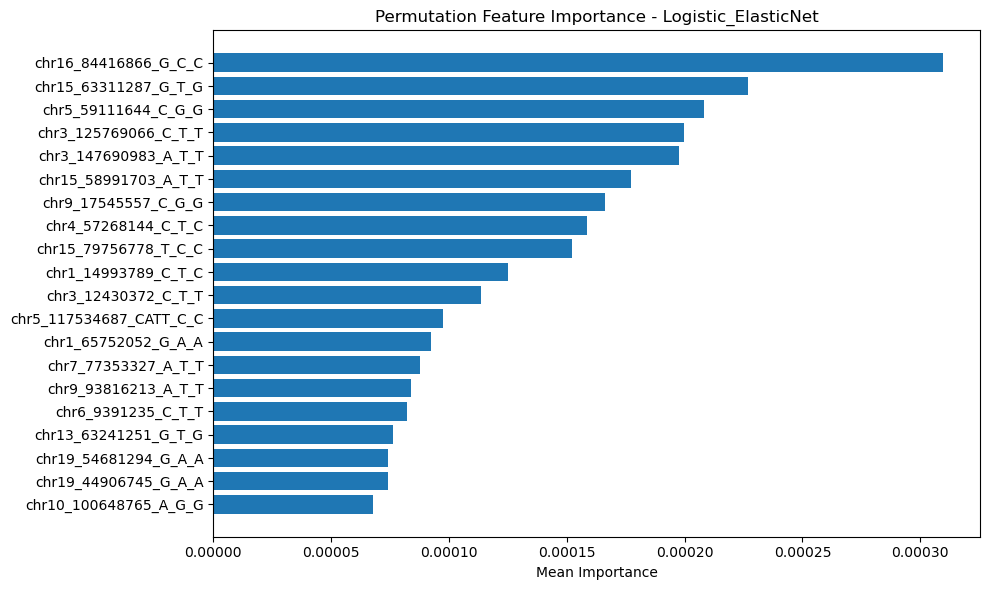


Evaluating XGBoost...
Mean ROC-AUC: 0.9292 ± 0.0228


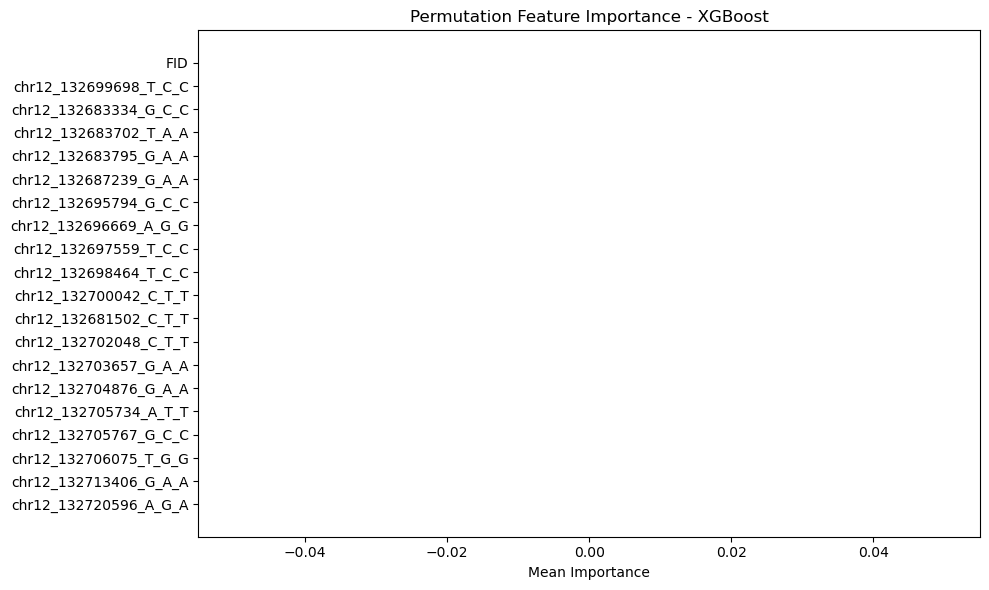


Evaluating LightGBM...
Mean ROC-AUC: 0.9336 ± 0.0174
[LightGBM] [Info] Number of positive: 386, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3280
[LightGBM] [Info] Number of data points in the train set: 830, number of used features: 683
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465060 -> initscore=-0.139987
[LightGBM] [Info] Start training from score -0.139987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

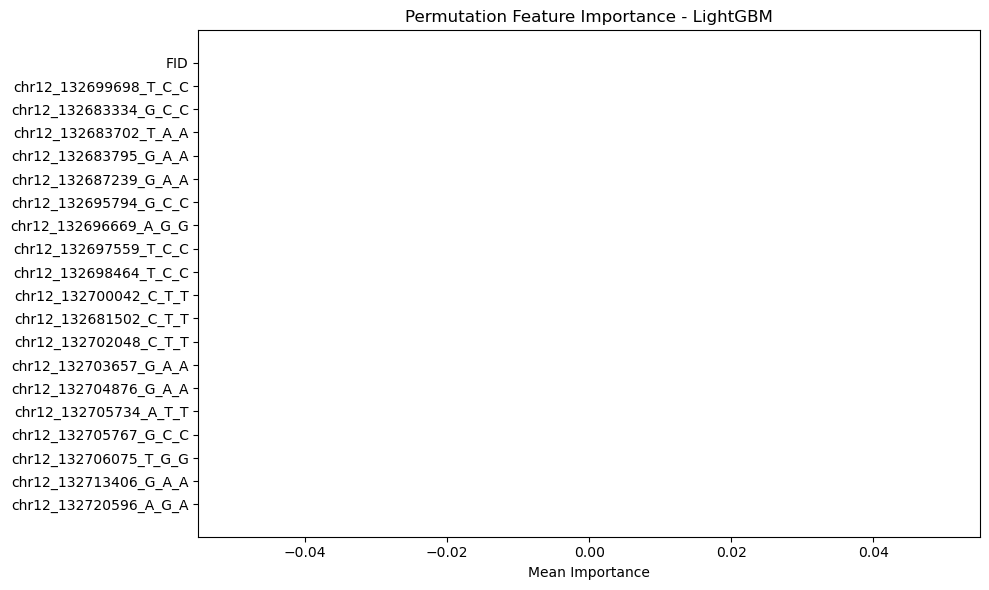


Evaluating CatBoost...
Mean ROC-AUC: 0.9597 ± 0.0152


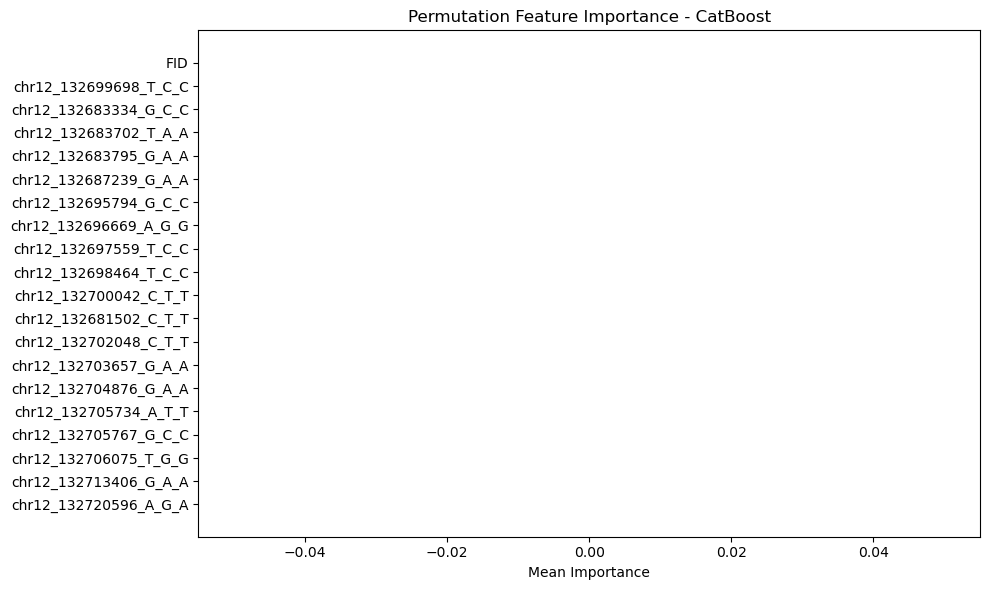


Evaluating NeuralNetwork...
Mean ROC-AUC: 0.9897 ± 0.0052


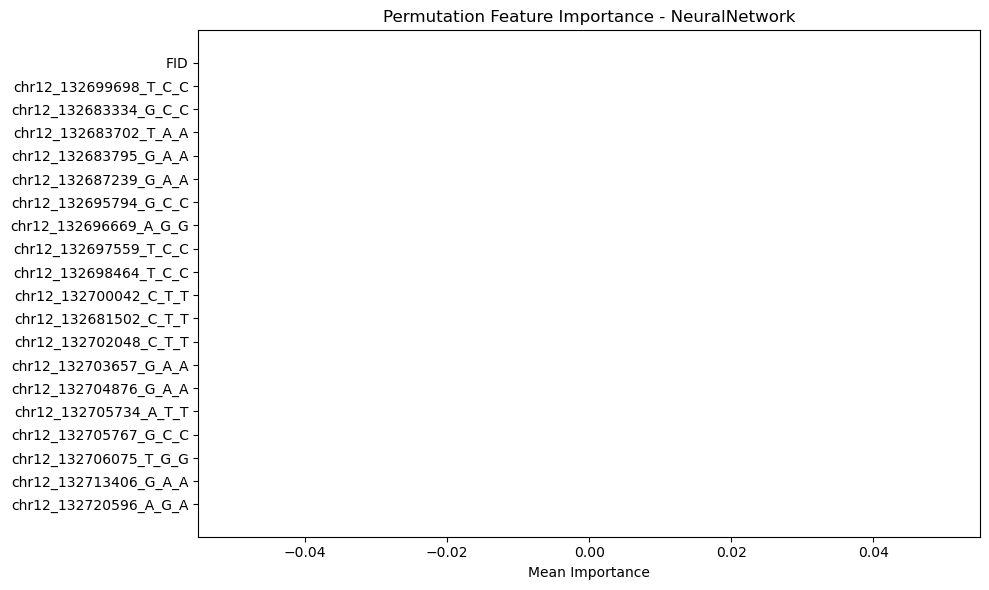

In [16]:
# === Cross-validation setup === #
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Evaluate models === #
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    
    # Cross-validated ROC-AUC
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    print(f"Mean ROC-AUC: {auc_scores.mean():.4f} ± {auc_scores.std():.4f}")
    
    # Fit the model on the full dataset to get feature importance
    model.fit(X, y)
    
    # Permutation Feature Importance (PFI)
    result = permutation_importance(model, X, y, scoring='roc_auc', n_repeats=10, random_state=42, n_jobs=-1)
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)
    
    # Save feature importance
    importance_df.to_csv(f"PFI_{name}.csv", index=False)
    
    # Plot top 20 features
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
    plt.xlabel('Mean Importance')
    plt.title(f'Permutation Feature Importance - {name}')
    plt.tight_layout()
    plt.savefig(f"PFI_{name}.png")
    plt.show()